Multiple Linear Regression In this regression, there are many independent variables instead of one and one dependent variable.

The equation of multiple linear regressions is: y = c0 + x1c1 + x2c2 + ...

Here it tries to calculate the values of c1, c2, c3,... and so on.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
import seaborn as sns

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/regression/house_pricing.csv")
df

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19
...,...,...,...,...,...,...
809,SACRAMENTO,Residential,4,3,2280,308248.47
810,SACRAMENTO,Residential,3,2,1477,212857.63
811,CITRUS HEIGHTS,Residential,3,2,1216,181746.98
812,ELK GROVE,Residential,4,2,1685,245385.59


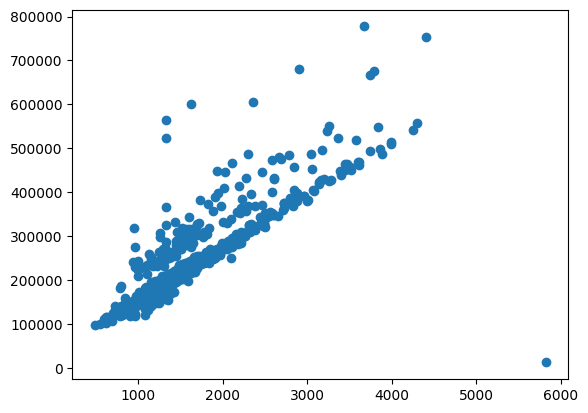

In [17]:
# Checking relation between Area and Price
plt.scatter(df.SquareFeet, df.Price)

With a change in area, there is a change in price. This is because price is dependent on the area of land.

Since with increase in area, there is an increase in price, this shows a positive correlation.

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

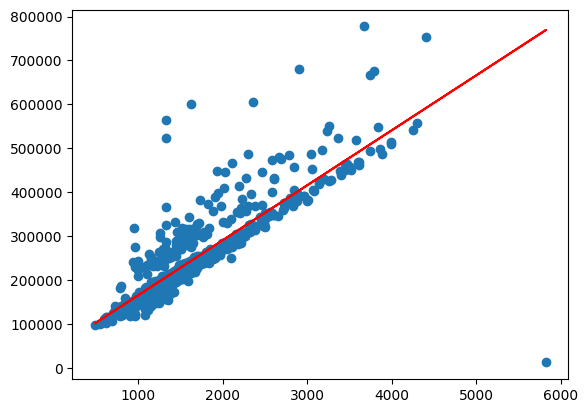

In [19]:
model.fit(df[['SquareFeet']], df.Price)
pred = model.predict(df[['SquareFeet']])

plt.scatter(df.SquareFeet, df.Price)
plt.plot(df.SquareFeet, pred, color='red')

In [20]:
# Taking out pearson correlation of Price
pc = df.SquareFeet.corr(df.Price)
print(pc)

0.851755035476082


In [21]:
# Taking out correlation with all other numeric data types
df.select_dtypes(include='number').corrwith(df.Price)

Beds          0.609677
Baths         0.632218
SquareFeet    0.851755
Price         1.000000
dtype: float64

If the value is close to 0, then no correlation. If it is close to 1, then positive correlation. If it is close to -1, then negative correlation

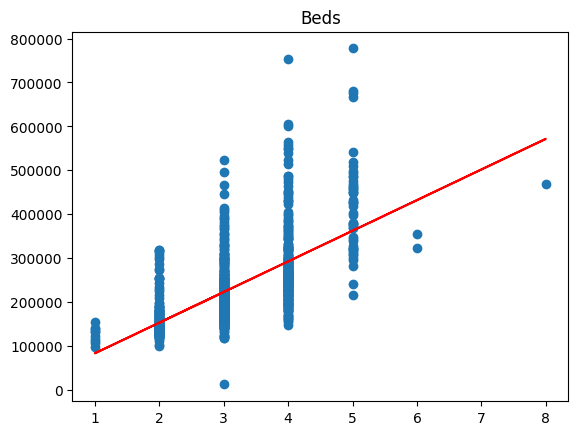

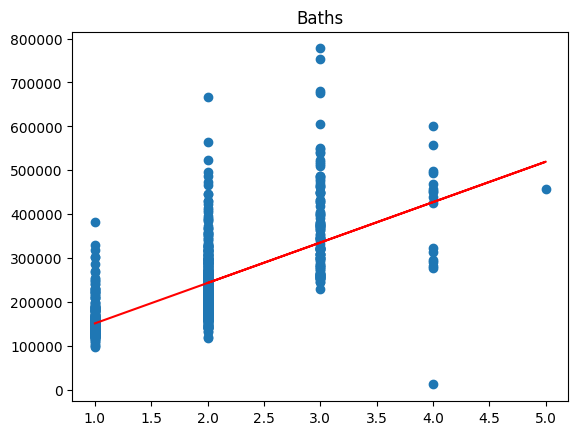

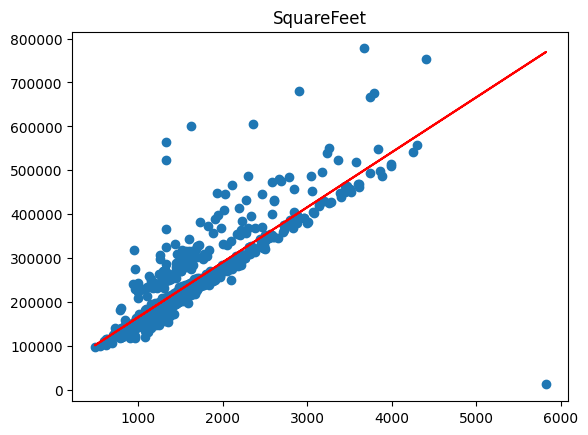

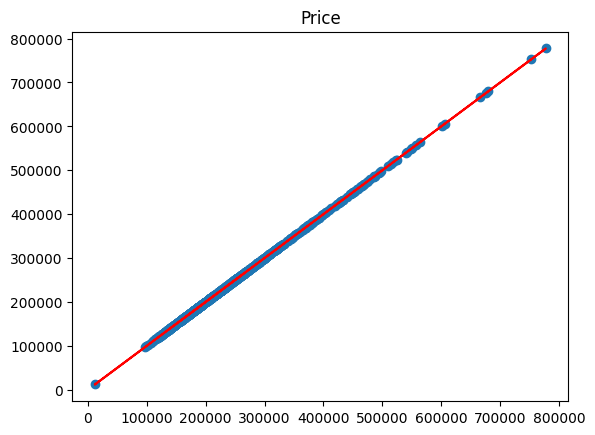

In [22]:
# Printing charts with each of the numeric columns
columns = df.select_dtypes(include='number')
for column in columns:
    plt.scatter(df[column], df.Price)
    plt.title(column)
    model = LinearRegression()
    model.fit(df[[column]], df.Price)
    plt.plot(df[column], model.predict(df[[column]]), color='red')
    plt.show()

For categorical independent variables with numerical target, we will do:

1. BoxPlot Analysis
2. Anova Test:
   - Null Hypothesis: Means of the groups are equal
   - If p-value < 0.05, reject null hypothesis
   - If p-value > 0.05, fail to reject null hypothesis

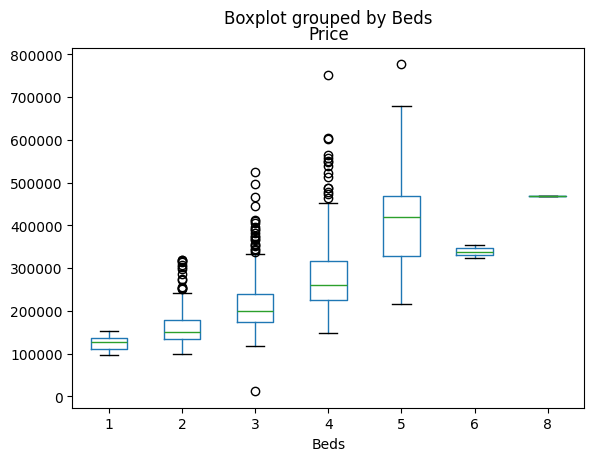

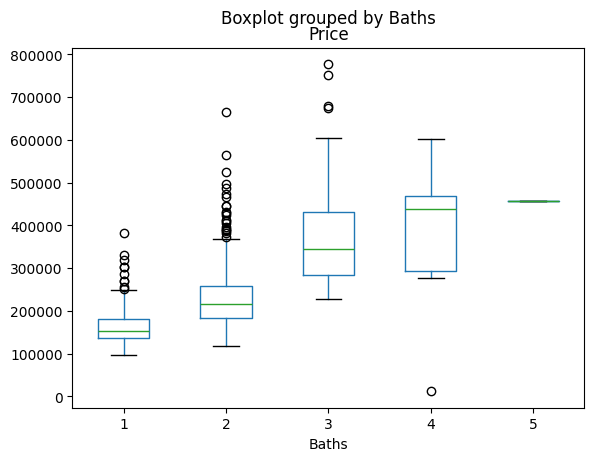

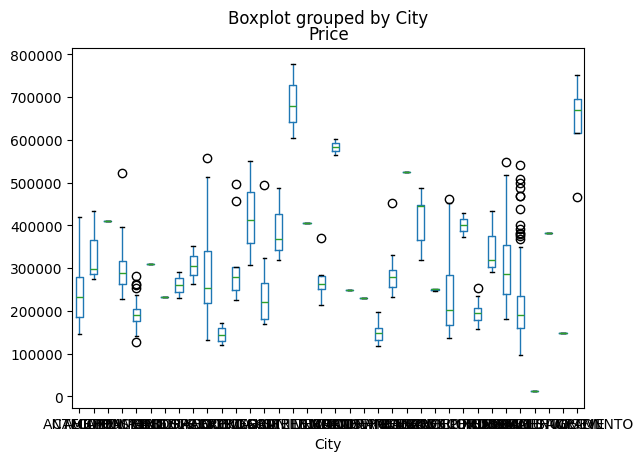

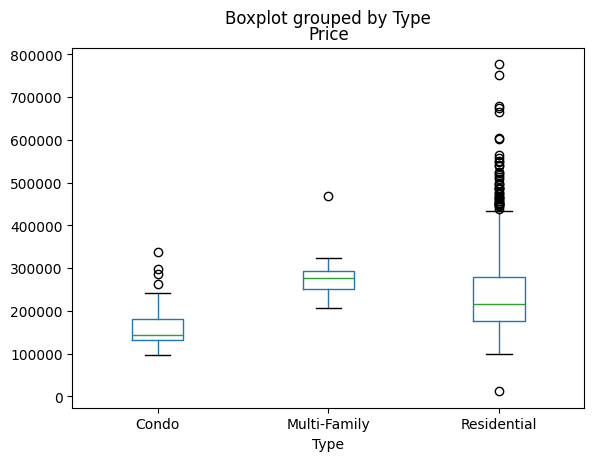

In [23]:
category_columns = ['Beds', 'Baths', 'City', 'Type']
for column in category_columns:
    df.boxplot(column='Price', by=column, grid=False)
    plt.show()

In [24]:
# We select the columns which are showing a positive correlation with the target
selected_columns = ['SquareFeet', 'Beds', 'Baths', 'Type']
x = df[selected_columns]
y = df.Price

model persistance (model to save karana)

In [25]:
import joblib 
import os 
# create a directory to save models 
os.makedirs(os.path.join(os.getcwd(),'models'), exist_ok=True)

# save model - dumpling (model to save karne ke liye )
path = os.path.join(os.getcwd(),'models', 'hosue_price_model')
joblib.dump(model,path)

['c:\\Users\\user\\OneDrive\\Documents\\AI FEB-2024\\Supervised_learning\\models\\hosue_price_model']

loading a saved model

In [26]:
path =os.path.join(os.getcwd(),'models', 'hosue_price_model')
joblib.load(path)

LinearRegression()

making predictions with a model

In [27]:
# very simple example data 
print(model.predict(X.head()))

NameError: name 'X' is not defined

In [ ]:
# manaul data input
X.columns.tolist()
inpX = pd.DataFrame({
    'SquareFeet': [2000],
    'Beds': [3],
    'Baths': [2],
    'Type':['Condo']
})
result = model.predict(inpX)
print(*result, sep='\n')

NameError: name 'X' is not defined

evaluating the training and testing performance of a model

In [28]:
from sklearn.model_selection import learning_curve, cross_val_score

test_sizes = [.5, .4, .3, .2, .1]
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes = test_sizes)

print(train_sizes)
print(train_scores.mean(axis=1))
print(test_scores.mean(axis=1))

# plot learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train', marker='o')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test', marker='o')
plt.legend()
plt.show()

NameError: name 'X' is not defined

making a decision tree model , to check the updated accuracy 

In [29]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [ ]:
model2= Pipeline([
    ('pre', preprocessor),
    ('dt', DecisionTreeRegressor())
])
model2.fit(X_train, y_train)
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

print("Training Results")
print("MSE": mean_squared_error(y_train, y_train_pred))